In [1]:
import pandas as pd

data= pd.read_csv(r'D:/student_data_dashboard/Student_performance_data.csv')
print(data.head(5))

data['GenderLabel'] =data['Gender'].map({0:'female',1:'male'})

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [18]:
print(data['StudentID'].count())

2392


In [20]:
print(data['GPA'].mean())

1.9061863027265407


In [24]:
a=data['Absences'].sum()
print(a)

34783


In [33]:
print(data['StudentID'].sum())
print( data.groupby('Gender')['StudentID'].count())


5254028
Gender
0    1170
1    1222
Name: StudentID, dtype: int64


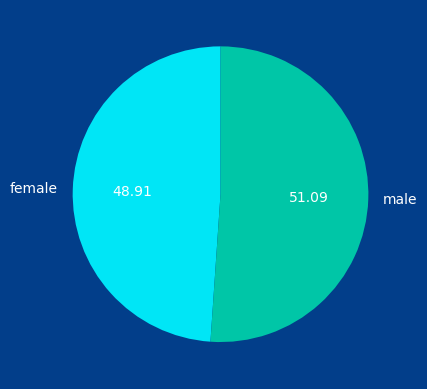

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

color=["#00E6F6", "#00C6A7", "#66FCF1", "#6C5CE7", "#5F27CD", "#1B9CFC"]

gp=data.groupby('Gender')['StudentID'].count()

fig, ax = plt.subplots()
ax.pie(x= gp ,labels= ['female','male'],autopct= '%.2f',startangle=90,colors=color,textprops={'color': 'white'})



fig.patch.set_facecolor('#023e8a')   # outer area
ax.set_facecolor('#023e8a')         # area behind the pie chart

sns.despine()
#plt.savefig("genderwise1.png")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_9320\92364102.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data,x='Ethnicity' ,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_9320\92364102.py:12: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax=sns.countplot(data=data,x='Ethnicity' ,palette=color)


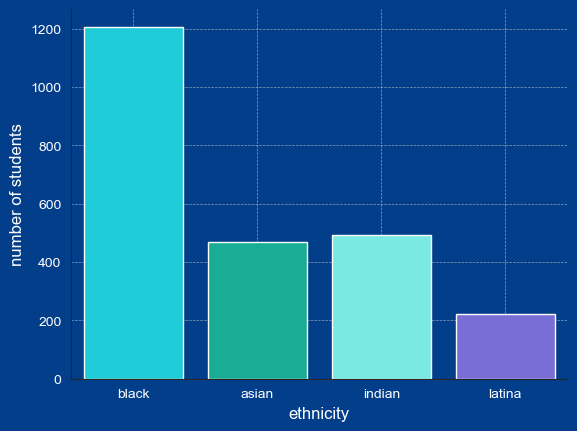

In [17]:
data= pd.read_csv(r'D:/student_data_dashboard/Student_performance_data.csv')

ethnicity={
    0:'black',
    1:'indian',
    2:'asian',
    3:'latina'}
data['Ethnicity']=data['Ethnicity'].map(ethnicity)



ax=sns.countplot(data=data,x='Ethnicity' ,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('Parental Support', color='white', fontsize=12)
ax.set_ylabel('GPA', color='white', fontsize=12)
ax.tick_params(colors='white')


plt.ylabel('number of students')
plt.xlabel('ethnicity')           
sns.despine()        
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("ethwise2.png")
plt.show()



In [61]:
gp=data.groupby('ParentalEducation')['StudentID'].count()
print(gp)

ParentalEducation
0    243
1    728
2    934
3    367
4    120
Name: StudentID, dtype: int64


C:\Users\ABC\AppData\Local\Temp\ipykernel_9320\2370073795.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data,x='ParentalEducationLabel' ,palette=color )
C:\Users\ABC\AppData\Local\Temp\ipykernel_9320\2370073795.py:13: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax=sns.countplot(data=data,x='ParentalEducationLabel' ,palette=color )


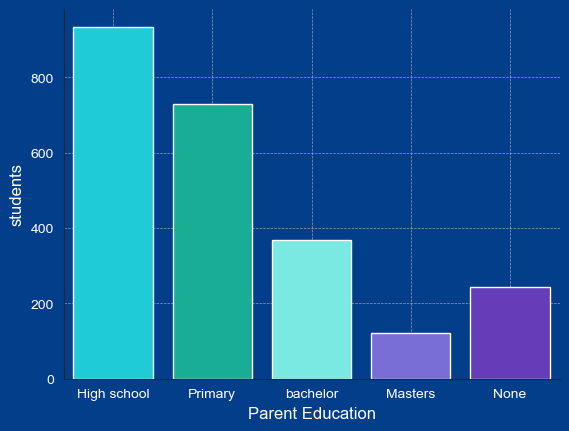

In [23]:
import seaborn as sns
data= pd.read_csv(r'D:/student_data_dashboard/Student_performance_data.csv')
data['GenderLabel'] =data['Gender'].map({0:'female',1:'male'})
edu={
    0:'None',
    1:'Primary',
    2:'High school',
    3:'bachelor',
    4:'Masters'}
data['ParentalEducationLabel']=data['ParentalEducation'].map(edu)


ax=sns.countplot(data=data,x='ParentalEducationLabel' ,palette=color )
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('Parent Education', color='white', fontsize=12)
ax.set_ylabel('students', color='white', fontsize=12)
ax.tick_params(colors='white')





sns.despine()        
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("parentedu3.png")
plt.show()



C:\Users\ABC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


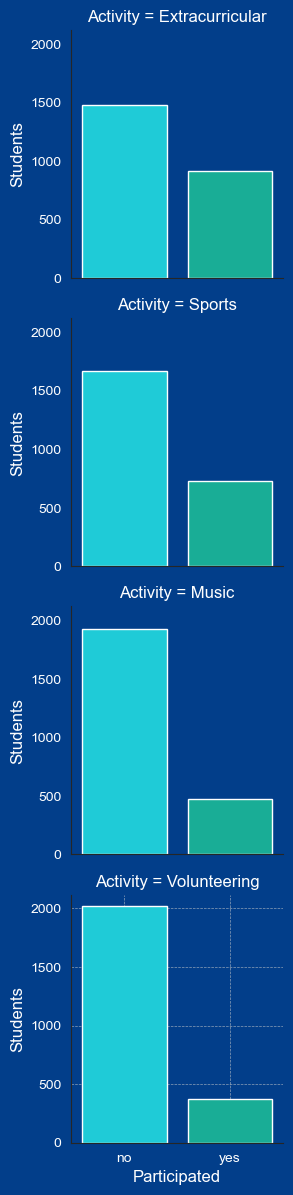

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data= pd.read_csv(r'D:/student_data_dashboard/Student_performance_data.csv')

#melt-
#It turns multiple columns into two columns:
#one for the column name (called variable)
#one for the value inside each cell (called value)
activity_col = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

melted = data[activity_col].melt(var_name='Activity', value_name='Participation')

melted['participated']=melted['Participation'].map({1:'yes',0:'no'})


g=sns.FacetGrid(data=melted ,row='Activity',hue='participated',palette=color)
g.map(sns.countplot, 'participated')
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

for ax in g.axes.flatten():
    ax.set_facecolor('#023e8a')  # Match chart bg
    ax.set_xlabel("Participated", color='white', fontsize=12)
    ax.set_ylabel("Students", color='white', fontsize=12)
    ax.tick_params(colors='white')
    ax.set_title(ax.get_title(), color='white')

sns.despine()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("activity1_row.png")
plt.show()
#


C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\613247872.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data ,x='GradeClass',y='StudyTimeWeekly',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\613247872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data ,x='GradeClass',y='StudyTimeWeekly',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\613247872.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax=sns.barplot(data=data ,x='GradeClass',y='StudyTimeWeekly',ci=None,palette=color)


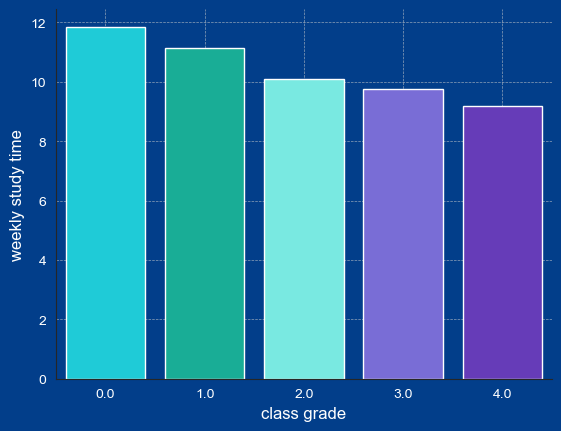

In [6]:

ax=sns.barplot(data=data ,x='GradeClass',y='StudyTimeWeekly',ci=None,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('class grade', color='white', fontsize=12)
ax.set_ylabel('weekly study time', color='white', fontsize=12)
ax.tick_params(colors='white')
sns.despine()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("weeklystudy2.png")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\3150432329.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=data ,x='parenteducationlabel',y='GPA',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\3150432329.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax=sns.boxplot(data=data ,x='parenteducationlabel',y='GPA',palette=color)


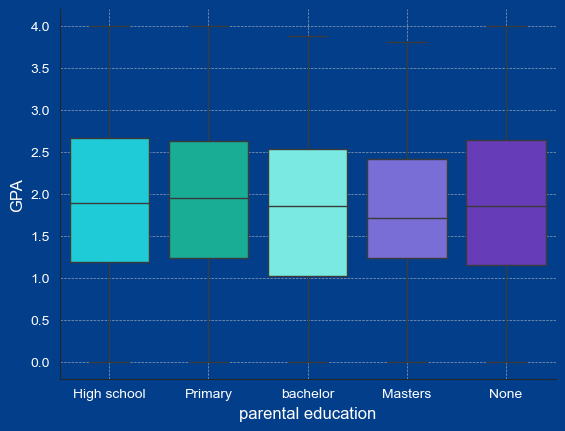

In [7]:
edu={
    0:'None',
    1:'Primary',
    2:'High school',
    3:'bachelor',
    4:'Masters'}

data['parenteducationlabel']=data['ParentalEducation'].map(edu)

ax=sns.boxplot(data=data ,x='parenteducationlabel',y='GPA',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('parental education', color='white', fontsize=12)
ax.set_ylabel('GPA', color='white', fontsize=12)
ax.tick_params(colors='white')
sns.despine()

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("parentedu_vs_gpa1.png")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\4047491922.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data , x='tutoringlabel' ,y='GPA',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\4047491922.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data , x='tutoringlabel' ,y='GPA',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\4047491922.py:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax=sns.barplot(data=data , x='tutoringlabel' ,y='GPA',ci=None,palette=color)


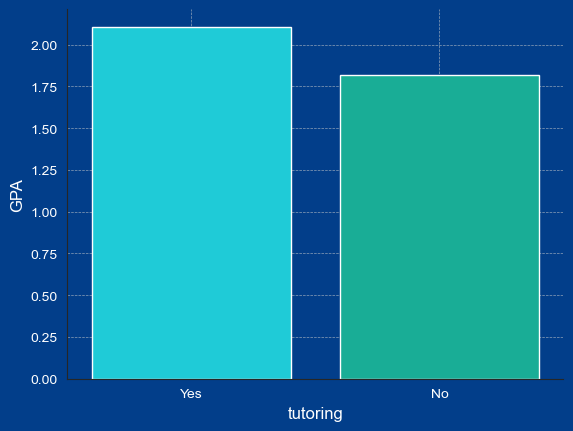

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data= pd.read_csv(r'D:/student_data_dashboard/Student_performance_data.csv')
tutor={
    0:'No',
    1:'Yes'
  }

data['tutoringlabel']=data['Tutoring'].map(tutor)

ax=sns.barplot(data=data , x='tutoringlabel' ,y='GPA',ci=None,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('tutoring', color='white', fontsize=12)
ax.set_ylabel('GPA', color='white', fontsize=12)
ax.tick_params(colors='white')
sns.despine()

plt.xlabel('tutoring')
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("tutoring1.png")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\831258491.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data , x='GradeClass' ,y='Absences',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\831258491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data , x='GradeClass' ,y='Absences',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_4388\831258491.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax=sns.barplot(data=data , x='GradeClass' ,y='Absences',ci=None,palette=color)


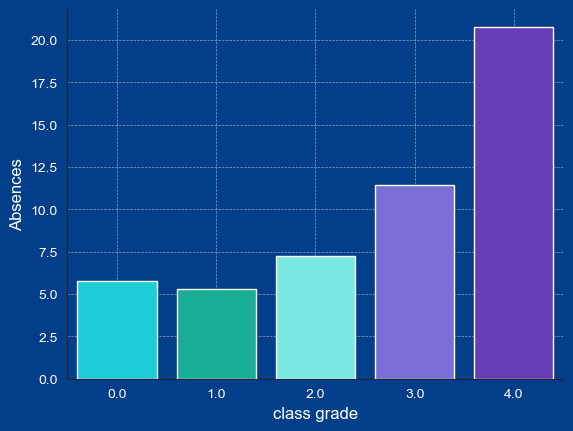

In [9]:
ax=sns.barplot(data=data , x='GradeClass' ,y='Absences',ci=None,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('class grade', color='white', fontsize=12)
ax.set_ylabel('Absences', color='white', fontsize=12)
ax.tick_params(colors='white')
sns.despine()

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("absent_vs_grade1.png")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_11088\40650592.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data , x='parentsupportlabel' ,y='GPA',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_11088\40650592.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data , x='parentsupportlabel' ,y='GPA',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_11088\40650592.py:10: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax=sns.barplot(data=data , x='parentsupportlabel' ,y='GPA',ci=None,palette=color)


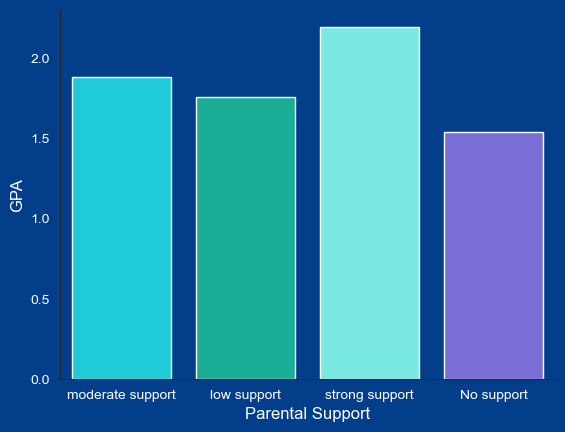

In [10]:
support={
    0:'No support',
    1:'low support',
    2:'moderate support',
    4:'strong support'
  }

data['parentsupportlabel']=data['ParentalSupport'].map(support)

ax=sns.barplot(data=data , x='parentsupportlabel' ,y='GPA',ci=None,palette=color)

sns.set_style("white", {
    'axes.facecolor': '#023e8a',
    'figure.facecolor': '#023e8a'
})

ax.set_xlabel('Parental Support', color='white', fontsize=12)
ax.set_ylabel('GPA', color='white', fontsize=12)
ax.tick_params(colors='white')
sns.despine()
plt.savefig("parentsupp_vs_gpa1.png")
plt.show()

